# Submitted By Parinita Goel

# BEMM458J Final assignment

## You are a business analyst at the marketing department of Coca Cola. There is an increasing debate on social media in relation to the negative impact of plastic consumption on the environment.

## As of recently NGOs have started campaigning against Coca Cola and other multinationals. 

## General management needs you to conduct an analysis of recent conversations posted on Twitter for the purposes of determining the communication strategies followed by NGOs and how Coca Cola must engage on social media.

In [401]:
import re

In [402]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [403]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [404]:
sns.set_style("whitegrid")

In [405]:
sns.set(font_scale=1.5)

In [406]:
pd.options.display.max_colwidth = 400

In [407]:
ConversationsLean=pd.read_csv('data/ConversationsLean.csv')

In [408]:
ConversationsLean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   447 non-null    int64  
 1   tweet.created_at             447 non-null    object 
 2   tweet.id                     447 non-null    float64
 3   tweet.full_text              447 non-null    object 
 4   tweet.entities               447 non-null    object 
 5   tweet.user.id                447 non-null    int64  
 6   tweet.user.screen_name       447 non-null    object 
 7   tweet.user.followers_count   447 non-null    int64  
 8   tweet.user.friends_count     447 non-null    int64  
 9   tweet.user.favourites_count  447 non-null    int64  
 10  tweet.user.statuses_count    447 non-null    int64  
 11  tweet.retweet_count          447 non-null    float64
 12  tweet.favorite_count         447 non-null    float64
 13  tweet.favorited     

In [409]:
ConversationsLean.iloc[50]

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                   4
tweet.created_at                                                                                                                                                                                                                                                                                                                                                                                                    2019-12-17 19:50:37.000000
tweet.id                                                                                                                                  

In [410]:
ConversationsLean.sample(3)

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.retweet_count,tweet.favorite_count,tweet.favorited,tweet.retweeted,tweet.lang,fetchedAt,tweet.full_text_clean,anger,fear,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic,stakeholder
284,238,2017-07-01 08:15:12.000000,8.810636e+17,"Don't be a man baby, ditch the plastic straw. #stopsucking #plasticpollutes #noplasticstraws #strawsuck #strawsfilm #plasticfreejuly https://t.co/cKzeVvLVkK","{'hashtags': [{'text': 'stopsucking', 'indices': [46, 58]}, {'text': 'plasticpollutes', 'indices': [59, 75]}, {'text': 'noplasticstraws', 'indices': [76, 92]}, {'text': 'strawsuck', 'indices': [93, 103]}, {'text': 'strawsfilm', 'indices': [104, 115]}, {'text': 'plasticfreejuly', 'indices': [116, 132]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 881063621266034688, 'id_st...",1362667831,NoPlasticStraws,4575,1555,1634,1787,12.0,23.0,False,False,en,2020-01-17 15:54:24.113783,"Don't be a man baby, ditch the plastic straw.",0.555447,0.128050,0.146542,0.020558,0.231172,0.023964,0.073210,0.475889,0.317824,0.022675,0.015714,0.878749,NGO
53,7,2019-12-02 15:07:06.000000,1.201518e+18,Sign the petition! Ban plastic bags for fresh produce #plasticfreeproduce @anitafromaus https://t.co/6pSRpKjsrq,"{'hashtags': [{'text': 'plasticfreeproduce', 'indices': [54, 73]}], 'symbols': [], 'user_mentions': [{'screen_name': 'anitafromaus', 'name': 'Anita Horan', 'id': 3887552174, 'id_str': '3887552174', 'indices': [74, 87]}], 'urls': [{'url': 'https://t.co/6pSRpKjsrq', 'expanded_url': 'https://www.aph.gov.au/petition_list?id=EN1181', 'display_url': 'aph.gov.au/petition_list?…', 'indices': [88, 111]}]}",71310291,PlasticPollutes,45953,6595,13453,18732,2.0,12.0,False,False,en,2019-12-29 07:02:29.624132,Sign the petition! Ban plastic bags for fresh produce,0.750741,0.206782,0.077486,0.017426,0.325260,0.028900,0.002309,0.003140,0.002642,0.002136,0.002092,0.005188,NGO
438,12,2017-12-28 20:28:17.000000,9.464779e+17,"RT @PlasticPollutes: #DidYouKnow Americans alone discard 30+ mil tons of plastic a year, only 8% is recycled. #RefuseSingleUse plastic when…","{'hashtags': [{'text': 'DidYouKnow', 'indices': [21, 32]}, {'text': 'RefuseSingleUse', 'indices': [110, 126]}], 'symbols': [], 'user_mentions': [{'screen_name': 'PlasticPollutes', 'name': 'Plastic Pollutes', 'id': 71310291, 'id_str': '71310291', 'indices': [3, 19]}], 'urls': []}",541280211,Algalita,2865,696,1778,3096,69.0,0.0,False,False,en,2019-12-29 07:27:49.479750,": Americans alone discard 30+ mil tons of plastic a year, only 8% is recycled. plastic when…",0.432412,0.198018,0.098556,0.018792,0.570367,0.033786,0.002264,0.004385,0.004218,0.001900,0.002034,0.021807,Scientific


In [411]:
pd.set_option('display.max_columns', 100)
#ConversationsLean.groupby('stakeholder').count()
ConversationsLean

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.retweet_count,tweet.favorite_count,tweet.favorited,tweet.retweeted,tweet.lang,fetchedAt,tweet.full_text_clean,anger,fear,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic,stakeholder
0,0,2019-03-05 00:55:05.000000,1.102734e+18,"The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.” #plasticpollutes #recyclingisnottheanswer https://t.co/yD75iVbd6k https://t.co/ocQbPhjqLN","{'hashtags': [{'text': 'plasticpollutes', 'indices': [150, 166]}, {'text': 'recyclingisnottheanswer', 'indices': [167, 191]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yD75iVbd6k', 'expanded_url': 'http://ow.ly/hiBp30nTeMf', 'display_url': 'ow.ly/hiBp30nTeMf', 'indices': [192, 215]}], 'media': [{'id': 1102734240221937664, 'id_str': '1102734240221937664', 'indices': [2...",71310291,PlasticPollutes,45953,6595,13453,18732,47.0,66.0,False,False,en,2019-12-29 07:02:29.624132,"The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.”",0.455982,0.131354,0.068569,0.018031,0.322537,0.027230,0.002061,0.002930,0.002914,0.002038,0.001993,0.006145,NGO
1,1,2018-10-04 17:01:10.000000,1.047894e+18,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/SCkJEb2U2v,"{'hashtags': [{'text': 'recycling', 'indices': [70, 80]}, {'text': 'plasticpollution', 'indices': [124, 141]}, {'text': 'plastics', 'indices': [183, 192]}, {'text': 'plasticpollutes', 'indices': [217, 233]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/47i9YjdxQv', 'expanded_url': 'https://bit.ly/2NnVI1Z', 'display_url': 'bit.ly/2NnVI1Z', 'indices': [193, 216]}], 'media'...",71310291,PlasticPollutes,45953,6595,13453,18732,15.0,21.0,False,False,en,2019-12-29 07:02:29.624132,USEPA report &amp; NEW projection shows plastic waste is rising while rates drop. Recycling is NOT the answer to . We need a systems shift away from toxic,0.544908,0.445253,0.038638,0.014274,0.514795,0.026532,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442,NGO
2,2,2018-10-04 14:33:54.000000,1.047857e+18,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/lEMEj4QECA,"{'hashtags': [{'text': 'recycling', 'indices': [70, 80]}, {'text': 'plasticpollution', 'indices': [124, 141]}, {'text': 'plastics', 'indices': [183, 192]}, {'text': 'plasticpollutes', 'indices': [217, 233]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/47i9YjdxQv', 'expanded_url': 'https://bit.ly/2NnVI1Z', 'display_url': 'bit.ly/2NnVI1Z', 'indices': [193, 216]}], 'media'...",71310291,PlasticPollutes,45953,6595,13453,18732,27.0,35.0,False,False,en,2019-12-29 07:02:29.624132,USEPA report &amp; NEW projection shows plastic waste is rising while rates drop. Recycling is NOT the answer to . We need a systems shift away from toxic,0.544908,0.445253,0.038638,0.014274,0.514795,0.026532,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442,NGO
3,3,2018-08-16 21:20:06.000000,1.030203e+18,Our plastic footprint: #reuse to take the pressure off #recycling https://t.co/faSl1s9pgx,"{'hashtags': [{'text': 'reuse', 'indices': [23, 29]}, {'text': 'recycling', 'indices': [55, 65]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/faSl1s9pgx', 'expanded_url': 'http://ow.ly/rsi530lpTfM', 'display_url': 'ow.

## Task 1. Which Twitter users are the most popular ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider retweet and favorite counts as proxies for popularity

In [412]:
df1= ConversationsLean[["tweet.user.screen_name","tweet.user.id","tweet.favorite_count","tweet.retweet_count"]] #Choosing Specific Columns from the Entire Dataset

In [413]:
df1.head()

,tweet.user.screen_name,tweet.user.id,tweet.favorite_count,tweet.retweet_count
0,PlasticPollutes,71310291,66.0,47.0
1,PlasticPollutes,71310291,21.0,15.0
2,PlasticPollutes,71310291,35.0,27.0
3,PlasticPollutes,71310291,56.0,45.0
4,5gyres,85732762,10.0,5.0


In [414]:
df2= df1.groupby(["tweet.user.id","tweet.user.screen_name"])[["tweet.favorite_count","tweet.retweet_count"]].sum() #Grouping the columns by tweet.user.id,tweet.user.screen_name
df2.reset_index()
# df2.head()
x = df2.nlargest(5, 'tweet.favorite_count')  #Taking the highest five tweet.favorite_count
y = df2.nlargest(5, 'tweet.retweet_count')   #Taking the highest five tweet.retweet_count

In [415]:
x

,,tweet.favorite_count,tweet.retweet_count
tweet.user.id,tweet.user.screen_name,,
3459051,Greenpeace,6357.0,3941.0
71310291,PlasticPollutes,4027.0,4242.0
23085995,Nestle,688.0,228.0
85732762,5gyres,636.0,569.0
172694825,WRAP_UK,625.0,474.0


In [416]:
result = x.append(y,sort=False)  #Merging the two datasets x and y
t=result.drop_duplicates().reset_index()
t

,tweet.user.id,tweet.user.screen_name,tweet.favorite_count,tweet.retweet_count
0,3459051,Greenpeace,6357.0,3941.0
1,71310291,PlasticPollutes,4027.0,4242.0
2,23085995,Nestle,688.0,228.0
3,85732762,5gyres,636.0,569.0
4,172694825,WRAP_UK,625.0,474.0
5,541280211,Algalita,17.0,540.0


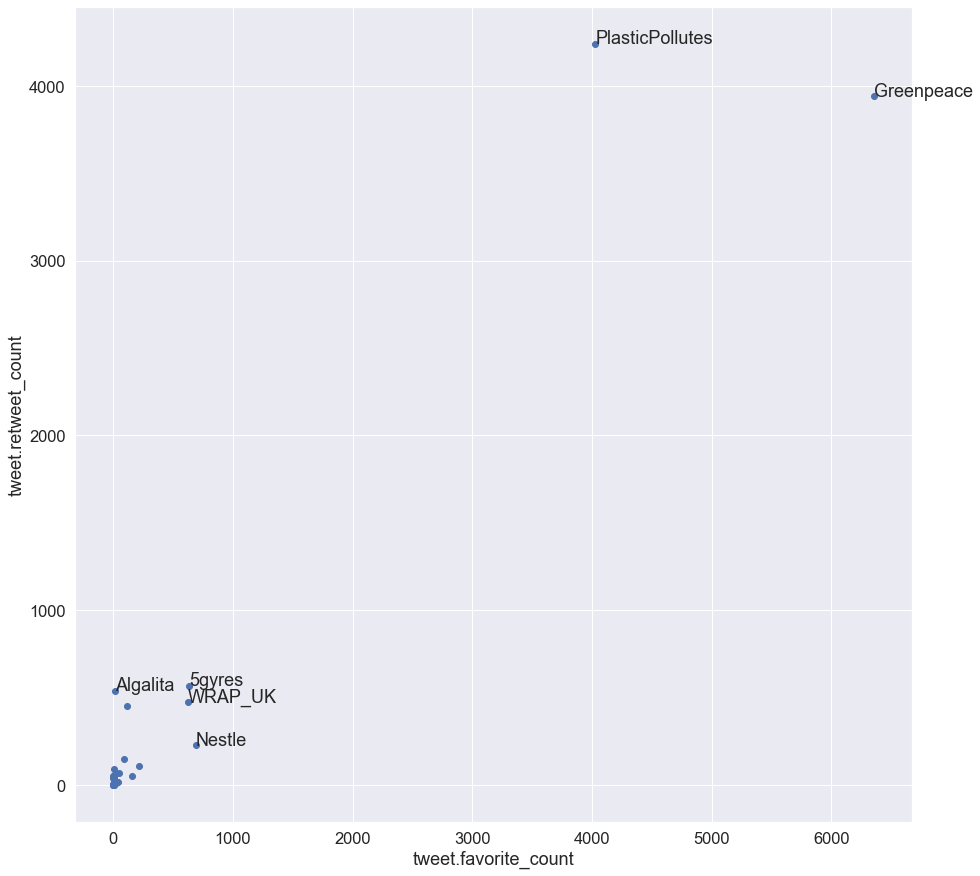

In [417]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
ax.scatter(data = df2,x="tweet.favorite_count",y="tweet.retweet_count")
plt.xlabel("tweet.favorite_count")
plt.ylabel("tweet.retweet_count")

for i, txt in enumerate(t['tweet.user.screen_name'].values):
    ax.annotate(txt, (t['tweet.favorite_count'][i], t['tweet.retweet_count'][i]))

### *From the above graph it can be seen that the Plastic Pollutes and GreenPeace are the most popular based on the number of favourite counts and retweet counts.*

## Task 2. Which Stakeholders users are the most emotional ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: visualize levels of emotions accross stakeholders (NGOs, artists, Multinational)

In [418]:
Emotions= ConversationsLean[["stakeholder","anger","fear","joy","love","sadness","trust"]]  #Subsetting the dataset containing the emotions 

In [419]:
a= Emotions.groupby("stakeholder")[["anger","fear","joy","love","sadness","trust"]].mean()
a["sum"]= a["anger"]+a["fear"]+a["joy"]+a["love"]+a["sadness"]+a["trust"]       # Adding "sum" column which is sum of all emotional quotient

In [420]:
a

,anger,fear,joy,love,sadness,trust,sum
stakeholder,,,,,,,
Artist,0.191531,0.142912,0.511195,0.123589,0.179675,0.054033,1.202935
Multinational,0.158001,0.157787,0.523263,0.105483,0.160258,0.063770,1.168562
NGO,0.356121,0.245599,0.293706,0.063486,0.272420,0.048228,1.279561
OtherInstitution,0.207091,0.169765,0.394409,0.059978,0.188679,0.056795,1.076716
Scientific,0.283057,0.160679,0.407954,0.098758,0.244664,0.051185,1.246298


In [421]:
df4 = a[['anger', 'fear', 'joy', 'love', 'sadness', 'trust']]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

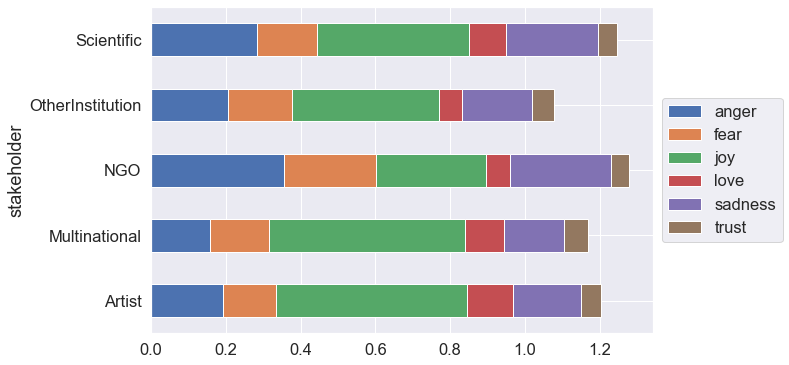

In [422]:
#visualization across stakeholders

plt.rcParams["figure.figsize"] = (9,6)

df4.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=0, ha='center')

### *From the above graph we can say that, the NGO is most emotional followed by Scientific Stakeholder, further followed by Artist.*

## Task 3. Do emotions play a role in the number of retweets and favorites achieved by tweets ? (20 %)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip:  correlations between variables
### Tip:  visualizations relating variables
### Tip:  optionally consider basic regression models to determine the impact of some variables on others (e.g. impact of love on favorite, impact of fear on retweet)

In [423]:
# Subsetting the dataset to take into account the relevant column names

df5 = ConversationsLean[["tweet.user.id","tweet.favorite_count","tweet.retweet_count","anger", "fear", "joy","love", "sadness", "trust"]]
df5.head().reset_index()

,index,tweet.user.id,tweet.favorite_count,tweet.retweet_count,anger,fear,joy,love,sadness,trust
0,0,71310291,66.0,47.0,0.455982,0.131354,0.068569,0.018031,0.322537,0.027230
1,1,71310291,21.0,15.0,0.544908,0.445253,0.038638,0.014274,0.514795,0.026532
2,2,71310291,35.0,27.0,0.544908,0.445253,0.038638,0.014274,0.514795,0.026532
3,3,71310291,56.0,45.0,0.285808,0.310826,0.061857,0.011482,0.424019,0.027274
4,4,85732762,10.0,5.0,0.215035,0.111665,0.403973,0.048335,0.167924,0.028655


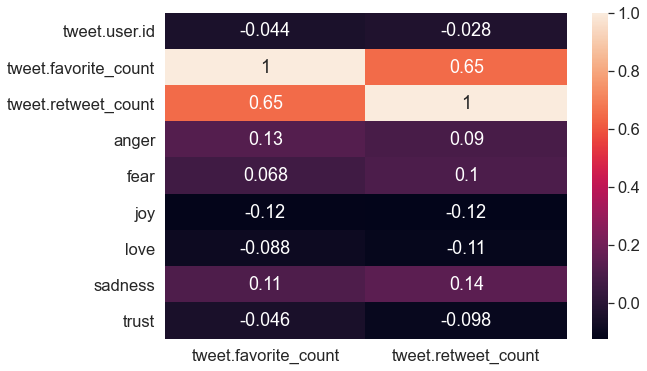

In [424]:
cm = df5.corr()[['tweet.favorite_count','tweet.retweet_count']]  #Corelation of emotions with tweet.favorite_count and tweet.retweet_count

sns.heatmap(cm, annot=True)  
plt.show()

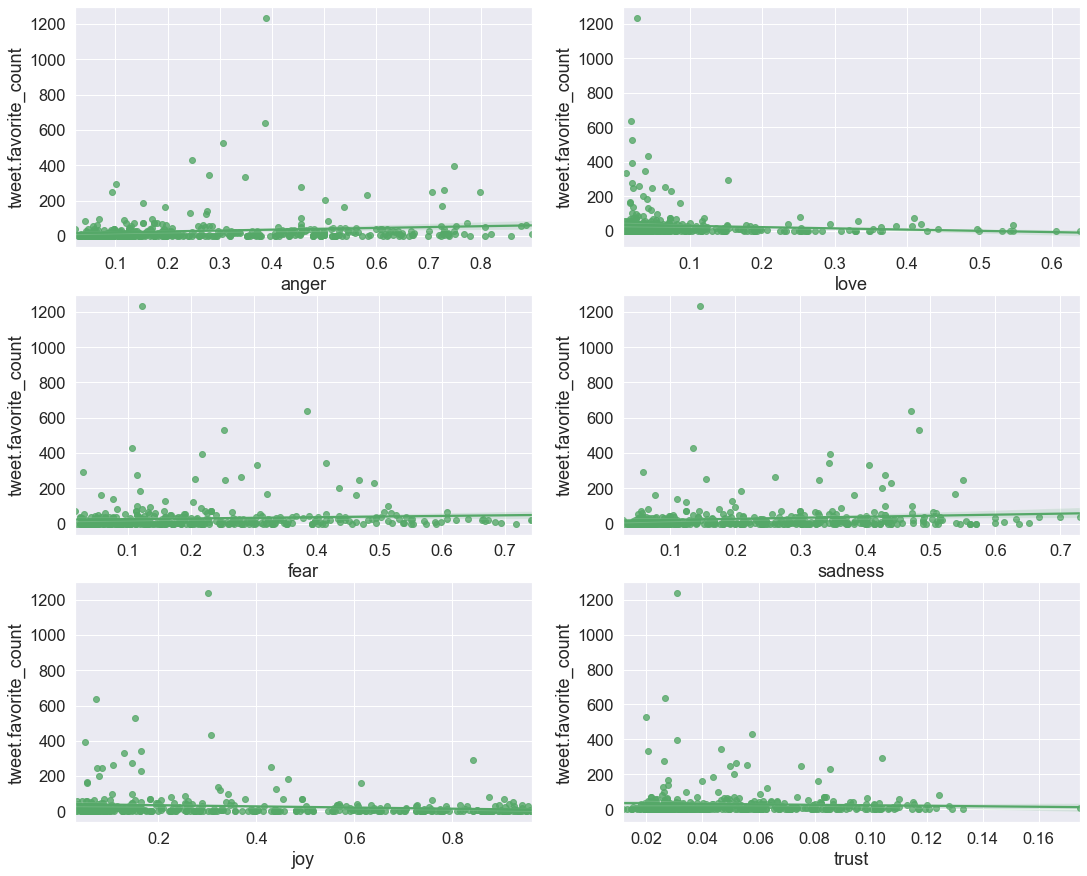

In [425]:
# Detailed Visualization of Emotion vs tweet.favorite_count
r = 3
c = 2
n = 0
plt.rcParams["figure.figsize"] = (18,15)
cl = ["anger", "fear", "joy","love", "sadness", "trust"]
fig,axes =  plt.subplots(r,c)
for n in range(len(cl)):
    ax1 = axes.T.flatten()
    sns.regplot(x = df5[cl[n]],y = df5['tweet.favorite_count'], ax=ax1[n],color="g")

In [426]:
# Detailed visualization of Emotion with tweet.retweet_count
#Grouping the values of emotions into three bins: 
    #( 0- 0.3)
    #( 0.3-0.7)
    #( 0.7-1)
df5['anger_bin'] = df5['anger'].apply(lambda x: 1 if x <= 0.3 else (2 if x<=0.7 else 3))
df5['fear_bin'] = df5['fear'].apply(lambda x: 1 if x <= 0.3 else (2 if x<=0.7 else 3))
df5['joy_bin'] = df5['joy'].apply(lambda x: 1 if x <= 0.3 else (2 if x<=0.7 else 3))
df5['love_bin'] = df5['love'].apply(lambda x: 1 if x <= 0.3 else (2 if x<=0.7 else 3))
df5['sadness_bin'] = df5['sadness'].apply(lambda x: 1 if x <= 0.3 else (2 if x<=0.7 else 3))
df5['trust_bin'] = df5['trust'].apply(lambda x: 1 if x <= 0.3 else (2 if x<=0.7 else 3))

<ipython-input-426-d79f0a68256b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-426-d79f0a68256b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-426-d79f0a68256b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-426-d79

In [427]:
# Aggregating the values of each bin for each emotion

ang_agg = df5.groupby(['anger_bin']).sum().reset_index()[['tweet.retweet_count','anger_bin']]
fear_agg = df5.groupby(['fear_bin']).sum().reset_index()[['tweet.retweet_count','fear_bin']]
joy_agg = df5.groupby(['joy_bin']).sum().reset_index()[['tweet.retweet_count','joy_bin']]
love_agg = df5.groupby(['love_bin']).sum().reset_index()[['tweet.retweet_count','love_bin']]
sadness_agg = df5.groupby(['sadness_bin']).sum().reset_index()[['tweet.retweet_count','sadness_bin']]
trust_agg = df5.groupby(['trust_bin']).sum().reset_index()[['tweet.retweet_count','trust_bin']]

In [428]:
import plotly.express as px
fig = px.funnel(y=ang_agg['tweet.retweet_count'].values, x=ang_agg['anger_bin'].values,width=400, height=400)
fig.show()

In [429]:
import plotly.express as px
fig = px.funnel(y=fear_agg['tweet.retweet_count'].values, x=fear_agg['fear_bin'].values,width=400, height=400)
fig.show()

In [447]:
import plotly.express as px
fig = px.funnel(y=joy_agg['tweet.retweet_count'].values, x=joy_agg['joy_bin'].values,width=400, height=400)
fig.show()

In [431]:
import plotly.express as px
fig = px.funnel(y=love_agg['tweet.retweet_count'].values, x=love_agg['love_bin'].values,width=400, height=400)
fig.show()

In [432]:
import plotly.express as px
fig = px.funnel(y=sadness_agg['tweet.retweet_count'].values, x=sadness_agg['sadness_bin'].values,width=400, height=400)
fig.show()

In [449]:
import plotly.express as px
fig = px.funnel(y=trust_agg['tweet.retweet_count'].values, x=trust_agg['trust_bin'].values,width=400, height=400)
fig.show()

In [434]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Task 4. Develop and apply a function which: (1) extracts ALL the hashtags from the column 'tweet.full_text', (2) saves the result as a new column (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider lambda functions applied to a dataframe

### Tip: refer to the module labs for examples on how to use REGEX in the context of pandas dataframes

In [435]:
ConversationsLean['hashtags'] = ConversationsLean['tweet.full_text'].apply(lambda row: re.findall(r'#(\w+)', row))
ConversationsLean

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.retweet_count,tweet.favorite_count,tweet.favorited,tweet.retweeted,tweet.lang,fetchedAt,tweet.full_text_clean,anger,fear,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic,stakeholder,hashtags
0,0,2019-03-05 00:55:05.000000,1.102734e+18,"The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.” #plasticpollutes #recyclingisnottheanswer https://t.co/yD75iVbd6k https://t.co/ocQbPhjqLN","{'hashtags': [{'text': 'plasticpollutes', 'indices': [150, 166]}, {'text': 'recyclingisnottheanswer', 'indices': [167, 191]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yD75iVbd6k', 'expanded_url': 'http://ow.ly/hiBp30nTeMf', 'display_url': 'ow.ly/hiBp30nTeMf', 'indices': [192, 215]}], 'media': [{'id': 1102734240221937664, 'id_str': '1102734240221937664', 'indices': [2...",71310291,PlasticPollutes,45953,6595,13453,18732,47.0,66.0,False,False,en,2019-12-29 07:02:29.624132,"The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.”",0.455982,0.131354,0.068569,0.018031,0.322537,0.027230,0.002061,0.002930,0.002914,0.002038,0.001993,0.006145,NGO,"[plasticpollutes, recyclingisnottheanswer]"
1,1,2018-10-04 17:01:10.000000,1.047894e+18,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/SCkJEb2U2v,"{'hashtags': [{'text': 'recycling', 'indices': [70, 80]}, {'text': 'plasticpollution', 'indices': [124, 141]}, {'text': 'plastics', 'indices': [183, 192]}, {'text': 'plasticpollutes', 'indices': [217, 233]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/47i9YjdxQv', 'expanded_url': 'https://bit.ly/2NnVI1Z', 'display_url': 'bit.ly/2NnVI1Z', 'indices': [193, 216]}], 'media'...",71310291,PlasticPollutes,45953,6595,13453,18732,15.0,21.0,False,False,en,2019-12-29 07:02:29.624132,USEPA report &amp; NEW projection shows plastic waste is rising while rates drop. Recycling is NOT the answer to . We need a systems shift away from toxic,0.544908,0.445253,0.038638,0.014274,0.514795,0.026532,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442,NGO,"[recycling, plasticpollution, plastics, plasticpollutes]"
2,2,2018-10-04 14:33:54.000000,1.047857e+18,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/lEMEj4QECA,"{'hashtags': [{'text': 'recycling', 'indices': [70, 80]}, {'text': 'plasticpollution', 'indices': [124, 141]}, {'text': 'plastics', 'indices': [183, 192]}, {'text': 'plasticpollutes', 'indices': [217, 233]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/47i9YjdxQv', 'expanded_url': 'https://bit.ly/2NnVI1Z', 'display_url': 'bit.ly/2NnVI1Z', 'indices': [193, 216]}], 'media'...",71310291,PlasticPollutes,45953,6595,13453,18732,27.0,35.0,False,False,en,2019-12-29 07:02:29.624132,USEPA report &amp; NEW projection shows plastic waste is rising while rates drop. Recycling is NOT the answer to . We need a systems shift away from toxic,0.544908,0.445253,0.038638,0.014274,0.514795,0.026532,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442,NGO,"[recycling, plasticpollution, plastics, plasticpollutes]"
3,3,2018-08-16 21:20:06.000000,1.030203e+18,Our plastic footprint: #reuse to take the pressure off #recycling https://t.co/faSl1s9pgx,"{'hashtags': [{'text': 'reuse', 'indices': [23, 29]}, {'text': 'recycl

## Task 5. what are the differences between stakeholders ?   (30%)

### Tip: explore differences in terms of emotions, popularity, hashtags used, number of tweets,etc

In [436]:
#Difference based on Emotions

Stk_sentiment = ConversationsLean.groupby('stakeholder').mean()[["anger", "fear", "joy","love", "sadness", "trust"]]
Stk_sentiment

,anger,fear,joy,love,sadness,trust
stakeholder,,,,,,
Artist,0.191531,0.142912,0.511195,0.123589,0.179675,0.054033
Multinational,0.158001,0.157787,0.523263,0.105483,0.160258,0.063770
NGO,0.356121,0.245599,0.293706,0.063486,0.272420,0.048228
OtherInstitution,0.207091,0.169765,0.394409,0.059978,0.188679,0.056795
Scientific,0.283057,0.160679,0.407954,0.098758,0.244664,0.051185


In [437]:
def highlight_last_max(data, colormax='antiquewhite', colormaxlast='yellow'):
    colormax_attr = f'background-color: {colormax}'
    colormaxlast_attr = f'background-color: {colormaxlast}'
    max_value = data.max()
    is_max = [colormax_attr if v == max_value else '' for v in data]
    is_max[len(data) - list(reversed(data)).index(max_value) -  1] = colormaxlast_attr
    return is_max

Stk_sentiment.style.apply(highlight_last_max,axis=0)

,anger,fear,joy,love,sadness,trust
stakeholder,,,,,,
Artist,0.191531,0.142912,0.511195,0.123589,0.179675,0.054033
Multinational,0.158001,0.157787,0.523263,0.105483,0.160258,0.063770
NGO,0.356121,0.245599,0.293706,0.063486,0.272420,0.048228
OtherInstitution,0.207091,0.169765,0.394409,0.059978,0.188679,0.056795
Scientific,0.283057,0.160679,0.407954,0.098758,0.244664,0.051185


### *The highlighted value shows the maximum Emotion of a Stakeholder*

In [438]:
#Difference based on Popularity

pop1 = ConversationsLean.groupby('stakeholder').sum()[['tweet.user.favourites_count','tweet.retweet_count']]
pop1['tweet_count'] = ConversationsLean.groupby('stakeholder').count()['tweet.id']
pop1 = pop1.reset_index()
pop1

,stakeholder,tweet.user.favourites_count,tweet.retweet_count,tweet_count
0,Artist,125179,281.0,104
1,Multinational,116208,391.0,20
2,NGO,2169058,9322.0,241
3,OtherInstitution,91898,512.0,51
4,Scientific,73116,680.0,24


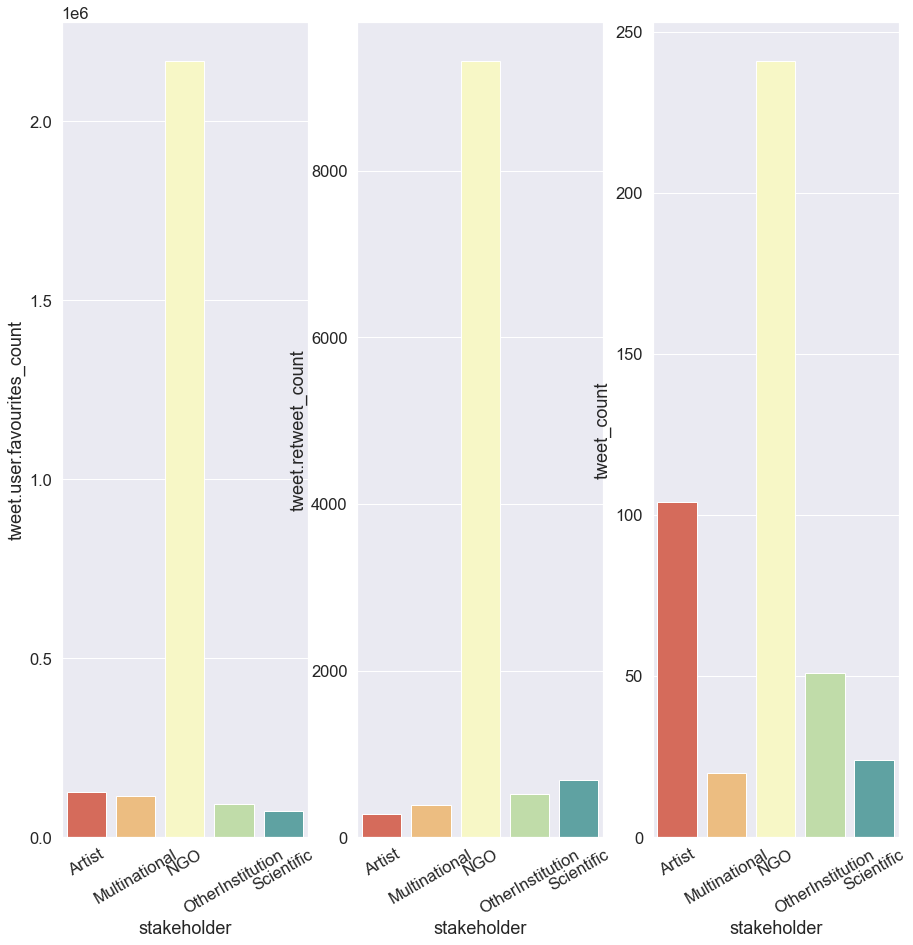

In [439]:
r = 1
c = 3
n = 0
plt.rcParams["figure.figsize"] = (15,15)
cl = ['tweet.user.favourites_count','tweet.retweet_count','tweet_count']
fig,axes =  plt.subplots(r,c)

 

for n in range(len(cl)):
    ax1 = axes.T.flatten()
    g = sns.barplot(pop1['stakeholder'], pop1[cl[n]], ax=ax1[n],palette="Spectral")
    g.set_xticklabels(g.get_xticklabels(),rotation=30)

### *The above graph shows the relation between the popularity parameters with the stakeholders*

In [440]:
# Difference based on Hashtags Used

NGO_hash = ConversationsLean[ConversationsLean['stakeholder']=='NGO']['hashtags'].values
NGO_hash = [item for sublist in NGO_hash for item in sublist]

Artist_hash = ConversationsLean[ConversationsLean['stakeholder']=='Artist']['hashtags'].values
Artist_hash = [item for sublist in Artist_hash for item in sublist]

Multinational_hash = ConversationsLean[ConversationsLean['stakeholder']=='Multinational']['hashtags'].values
Multinational_hash = [item for sublist in Multinational_hash for item in sublist]

OtherInstitution_hash = ConversationsLean[ConversationsLean['stakeholder']=='OtherInstitution']['hashtags'].values
OtherInstitution_hash = [item for sublist in OtherInstitution_hash for item in sublist]

Scientific_hash = ConversationsLean[ConversationsLean['stakeholder']=='Scientific']['hashtags'].values
Scientific_hash = [item for sublist in Scientific_hash for item in sublist]

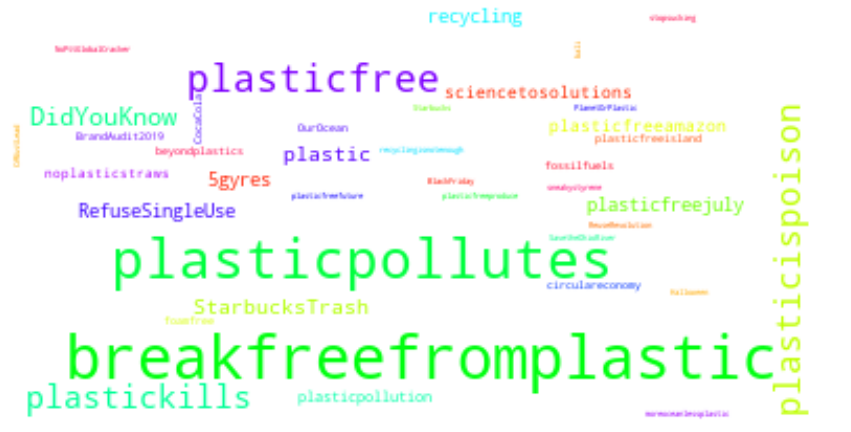

In [441]:
# Wordcloud_NGO

from collections import Counter 
import random
from wordcloud import WordCloud
text = random.sample(NGO_hash,len(NGO_hash))
ot = ' '.join(text)
# text
# # Create and generate a word cloud image:
wordcloud = WordCloud(colormap="hsv",background_color="white").generate(ot)

# Display the generated image:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### *Above are the hashtags for NGO*

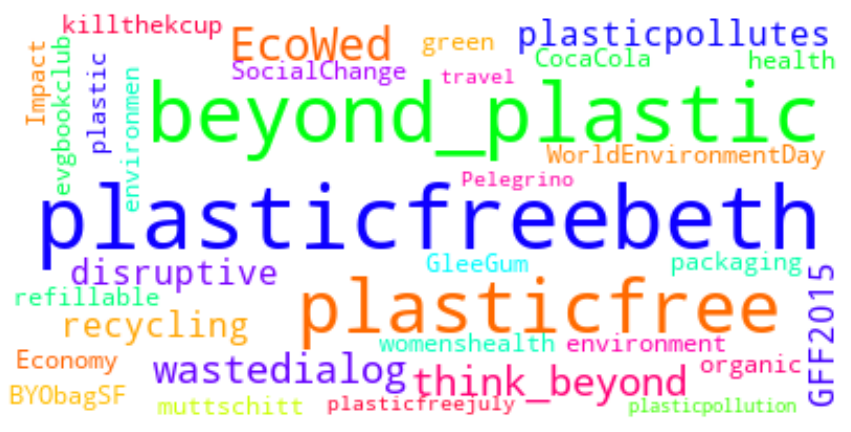

In [442]:
# Wordcloud_Artist

from collections import Counter 
import random
from wordcloud import WordCloud
text = random.sample(Artist_hash,len(Artist_hash))
ot = ' '.join(text)
# text
# # Create and generate a word cloud image:
wordcloud = WordCloud(colormap="hsv",background_color="white").generate(ot)

# Display the generated image:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### *Above are the hashtags for Artist*

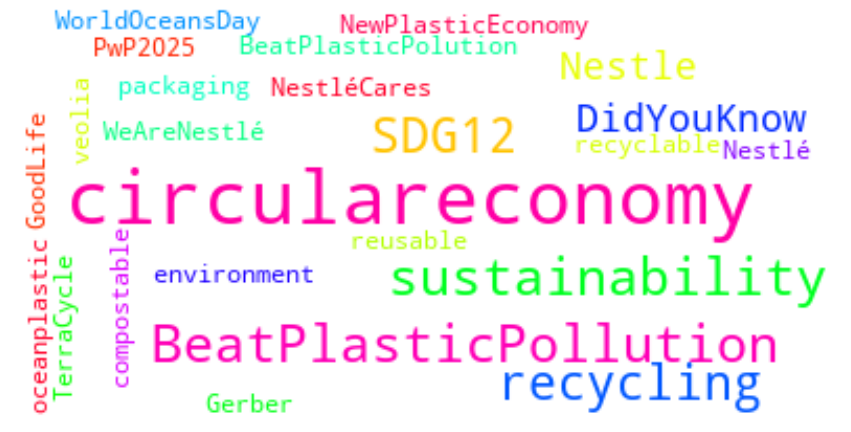

In [443]:
# wordCloud for Multinational

from collections import Counter 
import random
from wordcloud import WordCloud
text = random.sample(Multinational_hash,len(Multinational_hash))
ot = ' '.join(text)
# text
# # Create and generate a word cloud image:
wordcloud = WordCloud(colormap="hsv",background_color="white").generate(ot)

# Display the generated image:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### *Above are the hashtags for Multinational*

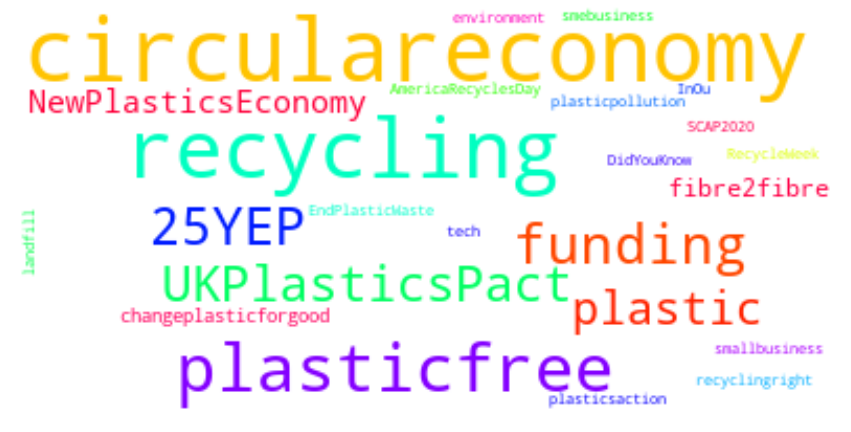

In [444]:
# Word_Cloud for OtherInstitution

from collections import Counter 
import random
from wordcloud import WordCloud
text = random.sample(OtherInstitution_hash,len(OtherInstitution_hash))
ot = ' '.join(text)
# text
# # Create and generate a word cloud image:
wordcloud = WordCloud(colormap="hsv",background_color="white").generate(ot)

# Display the generated image:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### *Above are the hashtags for Other Institutions*

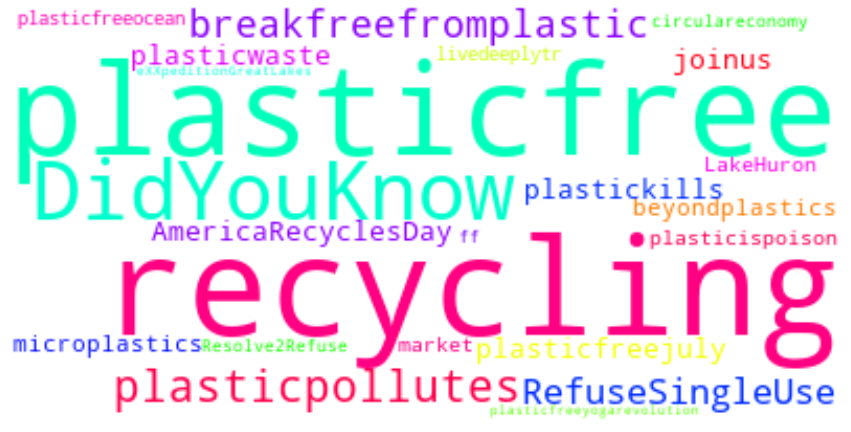

In [445]:
# Word Cloud for Scientific

from collections import Counter 
import random
from wordcloud import WordCloud
text = random.sample(Scientific_hash,len(Scientific_hash))
text1 = "Scientific"
ot = ' '.join(text)
# text
# # Create and generate a word cloud image:
wordcloud = WordCloud(colormap="hsv",background_color="white").generate(ot)

# Display the generated image:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


### *Above are the hashtags for Scientific*

## Following Analysis has been done for the above question:

#### 1. Highest number of tweets have been made by the NGO's and it has been fairly reciprocated by the twitter users by retweeting the same and also in terms of being the most favourited tweets.
#### 2. Reason for NGO's to be the most favoured ones is because of their drive and commitment to raise awareness amongst social media users and making use of the twitter platform to make an impact towards reducing hazards of plastic wastes.
#### 3. Artists involvement on twitter indicates they are making use of the opportunity to create awareness as well use their influence to draw attention to a global problem and work towards sustainable measures to curb the same.
#### 4. Scientific stake holders also seems to contribute via twitter by sharing information backed by research and lab analysis
#### 5. Multinational- It is the only multinational stake holders which seems less enthusiastic in addressing the issue of plastic waste and hence we see tweet from only a few proactive ones who are taking necessary actions to ensure that the use of plastic is minimized wherever possible.
#### 6. It is also observed that most of the tweets are from NGO stakeholder and the least hashtag tweets are from multinational companies.

## Task 6. what are your recommendations for Coca Cola as far as social media is concerned ?   (20%)

## Following Recommendations should be given to Coca Cola:

#### 1. Coca-Cola should work with well-known public Twitter users to raise public awareness and sell ideas about environmentally friendly habits and product reusability to their largest consumer market.
#### 2. Coca-Cola can motivate its workers to organise and participate in daily cleaning programmes for oceans, rivers, beaches, and parks by using the hashtag major stakeholders.
#### 3. Coca-Cola might devise a campaign in which they tweet how much plastic they recycle, making the general public aware of their efforts.
#### 4. Coca-Cola should perform a daily survey on social media in order to collect input from ordinary people around the world as well as stakeholders.
#### 5. Coca-Cola should work on developing plant-based resins for bottle packaging, developing light-weight packaging, or experimenting with alternative packaging.
#### 6. Coca-Cola must create a revenue-generating model based on the purchase and resale of used plastic bottles.